In [94]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [49]:
# d_url = "https://github.com/ageron/handson-ml"
d_path = os.path.join("datasets", "housing")
# housing_url = d_path + "data_sets/housing/housing.tgz"

# def fetch_housing_data(housing_url=housing_url, d_path=d_path):
#     if not os.path.isdir(d_path):
#         os.makedirs(d_path)
#     tgz_path = os.path.join(d_path, "housing.tgz")
#     urllib.request.urlretrieve(d_url, tgz_path)
#     housing_tgz = tarfile.open(tgz_path, "w")
#     housing_tgz.extractall(d_path)
#     housing_tgz.close()     

In [50]:
def load_housing_data(d_path=d_path):
    csv_path = os.path.join(d_path, "housing.csv")
    return pd.read_csv(csv_path)

In [53]:
housing = load_housing_data()

In [54]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [56]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


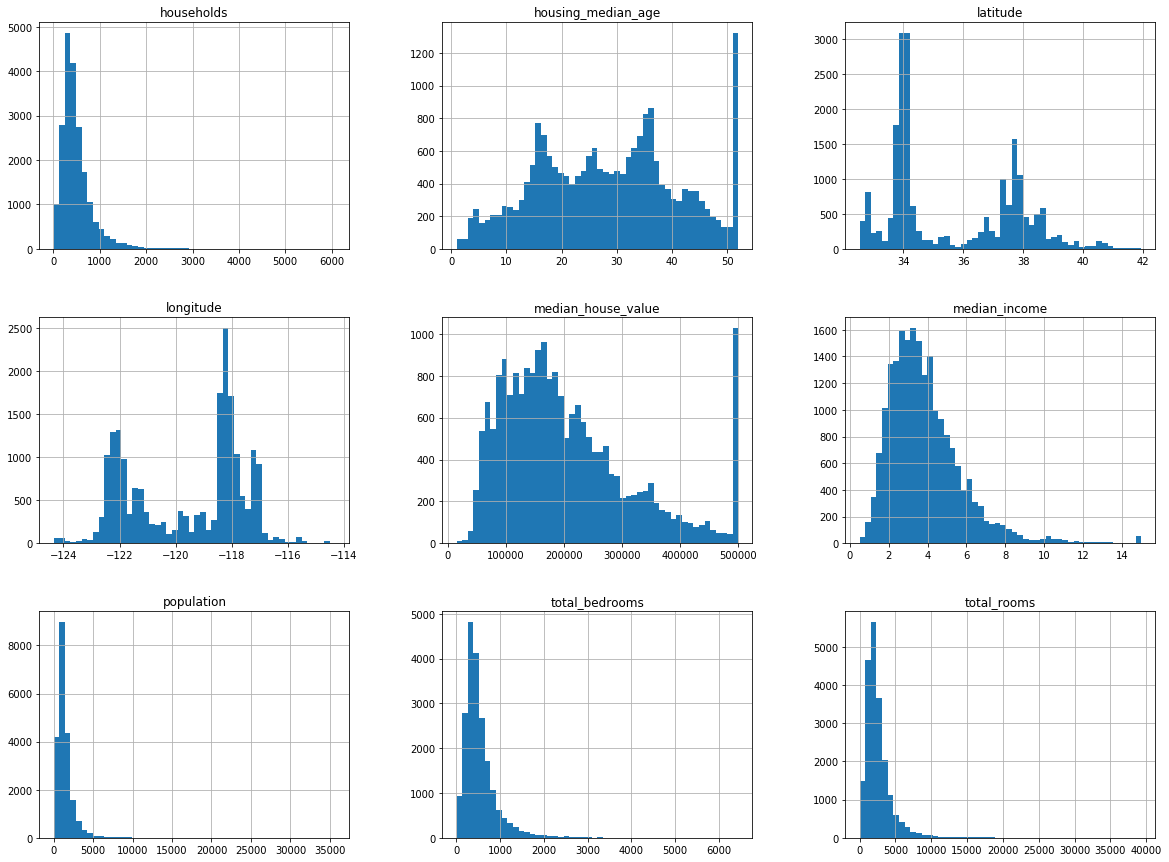

In [63]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [71]:
def split_data(data, test_ratio):
    # np.random.seed(123)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    train_indices = shuffled_indices[test_set_size:]
    test_indices = shuffled_indices[:test_set_size]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [81]:
train_set, test_set = split_data(housing, 0.2)

In [82]:
train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.572890,35.628401,28.662367,2641.566134,537.856033,1428.400073,499.903404,3.879276,207507.192224
std,2.000564,2.128049,12.590523,2209.134361,424.365957,1153.047005,385.498087,1.891140,115139.636350
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1446.000000,296.000000,788.000000,279.000000,2.570700,120675.000000
50%,-118.500000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.500000,3.545800,181100.000000
75%,-118.010000,37.710000,37.000000,3151.250000,645.250000,1727.000000,603.000000,4.757500,265500.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [83]:
test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.000000,4128.000000,4128.000000,4128.000000,4089.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.556962,35.645705,28.547965,2612.550872,537.928589,1413.783430,498.084787,3.836250,204250.315649
std,2.015551,2.167484,12.566783,2067.974557,409.304295,1046.130154,369.426723,1.934009,116391.490313
min,-124.250000,32.550000,2.000000,20.000000,4.000000,13.000000,5.000000,0.499900,14999.000000
25%,-121.722500,33.930000,18.000000,1453.000000,297.000000,785.000000,281.000000,2.532275,116625.000000
50%,-118.480000,34.260000,28.000000,2126.500000,437.000000,1160.500000,408.500000,3.500000,175000.000000
75%,-118.000000,37.722500,37.000000,3120.000000,652.000000,1715.250000,607.250000,4.710600,262500.000000
max,-114.580000,41.950000,52.000000,30405.000000,5419.000000,12873.000000,4930.000000,15.000100,500001.000000


In [92]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [93]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.006686
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.054618
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


In [95]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [97]:
strat_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,3.006541
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,1.054602
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,2.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,5.000000


In [98]:
housing = strat_train_set.copy()

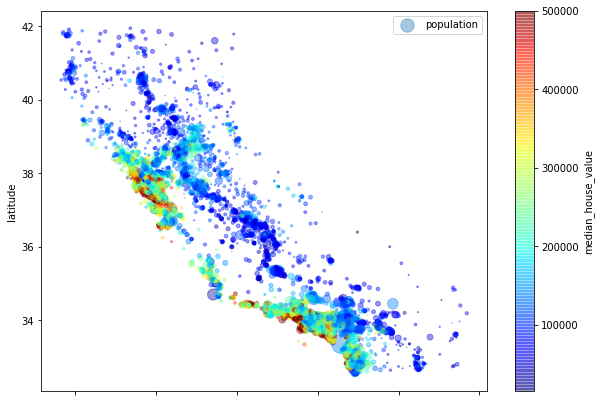

In [123]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            figsize=(10, 7), c="median_house_value", cmap=plt.get_cmap("jet"),
            colorbar=True)
# bar (barh) : 棒グラフ もしくは 横向き棒グラフ
# hist ：ヒストグラム
# box : 箱ひげ図
# kde ：確率密度分布
# area : 面積グラフ
# scattter : 散布図
# hexbin ：密度情報を表現した六角形型の散布図
# pie ：円グラフ
plt.legend()
plt.show()


In [124]:
corr_matrix = housing.corr()

In [128]:
corr_matrix["median_income"].sort_values(ascending=False)

median_income         1.000000
income_cat            0.902156
median_house_value    0.687160
total_rooms           0.200087
households            0.010781
population            0.002380
total_bedrooms       -0.009740
longitude            -0.019583
latitude             -0.075205
housing_median_age   -0.111360
Name: median_income, dtype: float64

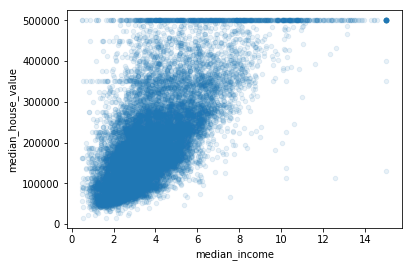

In [129]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
            alpha=0.1)